In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob

In [2]:
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

# print(all_filenames)

# #combine all files in the list
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# #export to csv
# combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

['combined_csv.csv', 'exams (1).csv', 'exams (2).csv', 'exams(3).csv', 'exams(4).csv', 'exams.csv']


In [2]:
# Read the CSV file into pandas DF

stu_data = pd.read_csv('combined_csv.csv')
stu_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,some college,free/reduced,completed,65,62,61
1,male,group D,bachelor's degree,standard,none,61,59,54
2,male,group A,some high school,standard,none,57,50,50
3,male,group C,bachelor's degree,free/reduced,none,63,64,56
4,female,group B,associate's degree,free/reduced,completed,57,87,82


In [3]:
boys = stu_data.loc[stu_data['gender'] == 'male']
girls = stu_data.loc[stu_data['gender'] == 'female']

std_lunch = stu_data.loc[stu_data['lunch'] == 'standard']
rdc_lunch = stu_data.loc[stu_data['lunch'] == 'free/reduced']

prep_yes = stu_data.loc[stu_data['test preparation course'] == 'completed']
prep_no = stu_data.loc[stu_data['test preparation course'] == 'none']

In [4]:
prep_no.count()

gender                         3205
race/ethnicity                 3205
parental level of education    3205
lunch                          3205
test preparation course        3205
math score                     3205
reading score                  3205
writing score                  3205
dtype: int64

## Student Test Scores
The goal is to determine based on this data set if there is a relationship between a series of factors and test scores

#### Factors
- Parent Education level
- Free School lunch (as a metric of poverty)
- Race/Ethicity
- A test prep course column in this data set

#### Encoding
- Gender 
    - Female - 0
    - Male - 1
- Race/Ethnicity 
    - Group A - 0 
    - Group B - 1 
    - Group C - 2
    - Group D - 3 
    - Group E - 4
- Lunch 
    - standard - 0
    - free/reduced - 1
- Parent Ed 
    - Some High School - 0 
    - High School - 1
    - Some College - 2
    - Associates - 3
    - Bachelor's - 4
    - Master's - 5
- Test Prep Course 
    - none - 0 
    - completed - 1

In [ ]:
# stu_data['gender'].replace('female', 0, inplace=True)
# stu_data['gender'].replace('male', 1, inplace=True)
# #stu_data.head()

# stu_data['parental level of education'].replace('some high school', 0, inplace = True)
# stu_data['parental level of education'].replace('high school', 1, inplace = True)
# stu_data['parental level of education'].replace('some college', 2, inplace = True)
# stu_data['parental level of education'].replace("associate's degree", 3, inplace = True)
# stu_data['parental level of education'].replace("bachelor's degree", 4, inplace = True)
# stu_data['parental level of education'].replace("master's degree", 5, inplace = True)
# #stu_data.head()

# stu_data['lunch'].replace('standard', 0, inplace=True)
# stu_data['lunch'].replace('free/reduced', 1, inplace=True)
# #stu_data.head()

# stu_data['race/ethnicity'].replace('group A', 0, inplace=True)
# stu_data['race/ethnicity'].replace('group B', 1, inplace=True)
# stu_data['race/ethnicity'].replace('group C', 2, inplace=True)
# stu_data['race/ethnicity'].replace('group D', 3, inplace=True)
# stu_data['race/ethnicity'].replace('group E', 4, inplace=True)
# stu_data['test preparation course'].replace('none', 0, inplace=True)
# stu_data['test preparation course'].replace('completed', 1, inplace=True)
# stu_data

In [5]:
stu_data = pd.get_dummies(stu_data)
stu_data.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,65,62,61,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
1,61,59,54,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
2,57,50,50,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
3,63,64,56,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
4,57,87,82,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0


In [6]:
stu_data = stu_data.drop(columns=['gender_male', 'lunch_standard', 'test preparation course_none'])
stu_data.head()

,math score,reading score,writing score,gender_female,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,test preparation course_completed
0,65,62,61,0,0,1,0,0,0,0,0,0,0,1,0,1,1
1,61,59,54,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,57,50,50,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,63,64,56,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,57,87,82,1,0,1,0,0,0,1,0,0,0,0,0,1,1


In [7]:
# Assign X (data) and y (target)

X = stu_data[['gender_female', 'race/ethnicity_group A', 'race/ethnicity_group B', 'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E', "parental level of education_associate's degree", "parental level of education_bachelor's degree", "parental level of education_high school", "parental level of education_master's degree", "parental level of education_some college", "parental level of education_some high school", 'lunch_free/reduced', 'math score', 'reading score', 'writing score']]
y = stu_data['test preparation course_completed'].values.reshape(-1, 1)
print(X.shape, y.shape)

(5000, 16) (5000, 1)


In [8]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [10]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

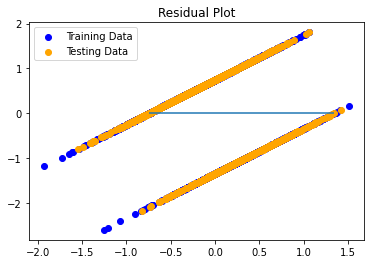

In [11]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [12]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7737845479082169, R2: 0.2343653623275873


We're going to have a hard time finding a relationiship with these features I think. Well, that is at least using straight linear regression. We may have to look into other models. This data is coming from a data generator hosted by some grad student at BYU. Here is the URL. http://roycekimmons.com/tools/generated_data/exams

The upside is that we can generate as much data as we want. So we could try to generate some model and actually feed data into it. That could be neat. So maybe there is potential there. Something that we could maybe do with this is rather than try to predict the scores, see if we could theoretically feed in scores along with a demographic factor to see if it could com